# Exploring Dandiset 001195: Separable Dorsal Raphe Dopamine Projections Mediate the Facets of Loneliness-like State

**⚠️ IMPORTANT: This notebook was AI-generated and has not been fully verified. Exercise caution when interpreting code or results. ⚠️**

## Overview of the Dandiset

This notebook explores Dandiset 001195, version 0.250408.1733, which contains data supporting research on dorsal raphe dopamine projections and their role in loneliness-like states in mice.

Link to Dandiset: [https://dandiarchive.org/dandiset/001195/0.250408.1733](https://dandiarchive.org/dandiset/001195/0.250408.1733)

The dataset consists primarily of intracellular electrophysiology recordings (patch-clamp) from neurons in various brain regions, including:
- Dorsal Raphe Nucleus (DRN)
- Central Amygdala (CeA)
- Bed Nucleus of the Stria Terminalis (BNST)
- Posterior Basolateral Amygdala (BLP)

The experiments involve different types of stimulation:
- Current injection steps (exploring passive and active membrane properties)
- Optogenetic stimulation with 635nm laser pulses
- Combined optogenetic stimulation with blue light

This notebook will demonstrate how to:
1. Access the Dandiset using the DANDI API
2. Load and explore NWB files containing electrophysiology data
3. Analyze and visualize passive membrane properties
4. Examine neuronal responses to current steps
5. Visualize action potential characteristics
6. Explore responses to optogenetic stimulation

## Required Packages

The following packages are needed to run this notebook:

In [1]:
# Standard libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import os

# NWB and data access libraries
import pynwb
import h5py
import remfile
from dandi.dandiapi import DandiAPIClient
from itertools import islice

# Set plotting style
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

## Accessing the Dandiset

Let's begin by connecting to the DANDI archive and retrieving basic information about the Dandiset.

In [2]:
# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("001195", "0.250408.1733")

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset ID: {metadata['identifier']}")
print(f"Dandiset version: {metadata['version']}")
print(f"Dandiset URL: {metadata['url']}")
print(f"Access type: {metadata['access'][0]['status']}")
print(f"License: {', '.join(metadata['license'])}")

Dandiset name: Separable Dorsal Raphe Dopamine Projections Mediate the Facets of Loneliness-like State
Dandiset ID: DANDI:001195
Dandiset version: 0.250408.1733
Dandiset URL: https://dandiarchive.org/dandiset/001195/0.250408.1733
Access type: dandi:OpenAccess
License: spdx:CC-BY-4.0


### Listing Available Assets

Let's list some of the assets available in this Dandiset to get a better understanding of the data structure:

In [3]:
# List some assets in the Dandiset
assets = dandiset.get_assets()
print("First 5 assets:")
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.identifier}, Size: {asset.size / 1e6:.2f} MB)")

First 5 assets:
- sub-23/sub-23_ses-20150324T134114_slice-slice-1_cell-C1_icephys.nwb (ID: a243dde4-c270-42a9-8550-025f5ffcd5a7, Size: 37.68 MB)
- sub-23/sub-23_ses-20150324T161217_slice-slice-2_cell-B3_icephys.nwb (ID: 8c1155c8-4531-4625-9515-e399f1b5f7bc, Size: 39.65 MB)
- sub-235/sub-235_ses-20200921T142415_slice-slice-1_cell-C3_icephys.nwb (ID: da3bb7c6-cd57-4c1a-92aa-2be38419088c, Size: 13.58 MB)
- sub-23/sub-23_ses-20150324T154615_slice-slice-2_cell-B2_icephys.nwb (ID: 85bf2dfb-0e2f-442d-b11c-e0d38bcc8783, Size: 42.28 MB)
- sub-23/sub-23_ses-20150324T152016_slice-slice-2_cell-B1_icephys.nwb (ID: 1bbc22a8-059d-4cd2-80c6-e1c20969ab19, Size: 84.23 MB)


## Exploring an NWB File

Now let's load one of the NWB files and explore its contents. We'll select a file containing intracellular electrophysiology recordings from subject 235.

In [4]:
# Select a specific NWB file to explore
ASSET_ID = "9029e9f3-949a-4cf3-ade5-48542a1a59b7"
FILE_PATH = "sub-235/sub-235_ses-20200921T131057_slice-slice-1_cell-C1_icephys.nwb"
FILE_URL = f"https://api.dandiarchive.org/api/assets/{ASSET_ID}/download/"

# Create a link to explore this file on Neurosift
neurosift_url = f"https://neurosift.app/nwb?url={FILE_URL}&dandisetId=001195&dandisetVersion=0.250408.1733"
print(f"View this file on Neurosift: {neurosift_url}")

# Load the NWB file
print(f"Loading NWB file: {FILE_PATH}")
remote_file = remfile.File(FILE_URL)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

View this file on Neurosift: https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/9029e9f3-949a-4cf3-ade5-48542a1a59b7/download/&dandisetId=001195&dandisetVersion=0.250408.1733
Loading NWB file: sub-235/sub-235_ses-20200921T131057_slice-slice-1_cell-C1_icephys.nwb


### NWB File Structure and Metadata

Let's examine the metadata and structure of this NWB file:

In [5]:
# Print basic information about the NWB file
print(f"Session description: {nwb.session_description}")
print(f"Identifier: {nwb.identifier}")
print(f"Session start time: {nwb.session_start_time}")
print(f"Experimenter: {nwb.experimenter}")
print(f"Lab: {nwb.lab}")
print(f"Institution: {nwb.institution}")

# Subject information
print("\nSubject Information:")
print(f"  Subject ID: {nwb.subject.subject_id}")
print(f"  Species: {nwb.subject.species}")
print(f"  Age: {nwb.subject.age}")
print(f"  Sex: {nwb.subject.sex}")
print(f"  Genotype: {nwb.subject.genotype}")
print(f"  Description: {nwb.subject.description}")

Session description: baseline
Identifier: 60e8e27e-9a3b-4b3f-83a6-888ded370e13
Session start time: 2020-09-21 13:10:57-07:00
Experimenter: ('Matthews, Gillian',)
Lab: Kay Tye Lab
Institution: The Salk Institute for Biological Studies

Subject Information:
  Subject ID: 235
  Species: Mus musculus
  Age: P282D
  Sex: M
  Genotype: heterozygote
  Description: AAV9-Syn-FLEX-Chrimson-TdTomato into DRN, AAV1-Syn-GCaMP7f into CeA


### Recording Details and Experimental Conditions

This NWB file contains recordings from the Central Amygdala (CeA) in a mouse expressing channelrhodopsin in dopaminergic neurons of the Dorsal Raphe Nucleus (DRN). The recordings were made in ex vivo brain slices, allowing for precise control of stimulation parameters.

Let's look at what stimulus types were used in this recording session:

In [6]:
# Get information about the stimulus types
seq_df = nwb.icephys_sequential_recordings.to_dataframe()
print("Stimulus types used in this recording session:")
for i, stim_type in enumerate(seq_df['stimulus_type'].unique()):
    print(f"  {i+1}. {stim_type}")

Stimulus types used in this recording session:
  1. baseline, seal test
  2. episodic stimulation, 1s steps, 20pA increments, -120pA to 260pA
  3. episodic stimulation, 8*30Hz 635nm laser pulses, 10mW, 5ms width, every 30s
  4. episodic stimulation, 8*30Hz 635nm laser pulses, 10mW, 5ms width, every 30s, +0.3mW cont blue light
  5. baseline, free-run
  6. episodic stimulation, 8*30Hz 635nm laser pulses, 10mW, 5ms width, every 30s, +0.3mW blue light
  7. episodic stimulation, 8*30Hz 635nm laser pulses, 10mW, 5ms width, every 30s, +0.2mW blue light


As we can see, the recordings include:
- Baseline/seal test recordings
- Current injection steps (-120 to 260 pA)
- Optogenetic stimulation with 635nm laser pulses (targeting channelrhodopsin)
- Combined optogenetic stimulation with continuous blue light

## Examining the Electrodes and Recording Devices

In [7]:
# List available electrodes
print("Available electrodes:")
for electrode_id, electrode in nwb.icephys_electrodes.items():
    print(f"  {electrode_id}")

Available electrodes:
  electrode-0
  electrode-1


### Intracellular Electrophysiology Data

Now let's examine what kinds of electrophysiology data series are available:

In [8]:
# Count the acquisition data types
series_types = {}
for series_name, series in nwb.acquisition.items():
    series_type = type(series).__name__
    if series_type in series_types:
        series_types[series_type] += 1
    else:
        series_types[series_type] = 1

print("Acquisition data types and counts:")
for series_type, count in series_types.items():
    print(f"  {series_type}: {count}")

# List a few example acquisition series
print("\nExample acquisition series:")
for i, series_name in enumerate(list(nwb.acquisition.keys())[:3]):
    series = nwb.acquisition[series_name]
    print(f"  {series_name}:")
    print(f"    Description: {series.description}")
    print(f"    Data shape: {series.data.shape}")
    print(f"    Unit: {series.unit}")
    print(f"    Rate: {series.rate} Hz")

Acquisition data types and counts:
  CurrentClampSeries: 146
  Images: 1
  IZeroClampSeries: 6

Example acquisition series:
  current_clamp-response-02-ch-0:
    Description: Response to: episodic stimulation, 1s steps, 20pA increments, -120pA to 260pA
    Data shape: (50000,)
    Unit: volts
    Rate: 10000.0 Hz
  current_clamp-response-02-ch-1:
    Description: Response to: episodic stimulation, 1s steps, 20pA increments, -120pA to 260pA
    Data shape: (50000,)
    Unit: volts
    Rate: 10000.0 Hz
  current_clamp-response-03-ch-0:
    Description: Response to: episodic stimulation, 1s steps, 20pA increments, -120pA to 260pA
    Data shape: (50000,)
    Unit: volts
    Rate: 10000.0 Hz


## Analyzing Passive Membrane Properties

Now we'll load response data from a hyperpolarizing current step to analyze passive membrane properties like input resistance and membrane time constant.

In [9]:
# Find a hyperpolarizing current step recording (negative current)
hyperpolarizing_responses = []
for series_name, series in nwb.acquisition.items():
    if 'step' in series.description.lower() and 'ch-0' in series_name:
        # Get the corresponding stimulus
        stim_name = series_name.replace('current_clamp-response', 'stimulus')
        stim_name = stim_name.replace('-ch-0', '-ch-0')
        
        if stim_name in nwb.stimulus:
            # Load a small chunk to check if it's a hyperpolarizing step
            stimulus = nwb.stimulus[stim_name]
            stim_data = stimulus.data[:1000] * stimulus.conversion
            if np.min(stim_data) < -1e-12:  # Check if it has negative current
                hyperpolarizing_responses.append((series_name, stim_name))
                if len(hyperpolarizing_responses) >= 1:
                    break

# Use the first hyperpolarizing response found
if hyperpolarizing_responses:
    response_name, stim_name = hyperpolarizing_responses[0]
    
    # Load the data
    response = nwb.acquisition[response_name]
    stimulus = nwb.stimulus[stim_name]
    
    # Create time array
    time = np.arange(response.data.shape[0]) / response.rate + response.starting_time
    
    # Convert data
    voltage_data = response.data[:] * response.conversion
    stim_data = stimulus.data[:] * stimulus.conversion
    
    # Find step start and end
    step_changes = np.where(np.diff(stim_data) != 0)[0]
    if len(step_changes) >= 2:
        step_start_idx = step_changes[0] + 1
        step_end_idx = step_changes[1] + 1
        
        step_start_time = time[step_start_idx]
        step_end_time = time[step_end_idx]
        
        # Calculate baseline and steady-state voltage
        baseline_window = (step_start_idx - int(0.1 * response.rate), step_start_idx)
        baseline_voltage = np.mean(voltage_data[baseline_window[0]:baseline_window[1]])
        
        steady_window = (step_start_idx + int(0.8 * response.rate), step_start_idx + int(0.9 * response.rate))
        steady_voltage = np.mean(voltage_data[steady_window[0]:steady_window[1]])
        
        # Calculate voltage deflection
        delta_v = steady_voltage - baseline_voltage
        
        # Calculate input resistance (R = V/I)
        current_amp = np.mean(stim_data[step_start_idx:step_end_idx])
        input_resistance = delta_v / current_amp
        
        # Plot the hyperpolarizing step
        plt.figure(figsize=(12, 6))
        plt.plot(time, voltage_data * 1e3)  # Convert to mV
        plt.axvspan(time[step_start_idx], time[step_end_idx], alpha=0.2, color='gray', label='Current step')
        plt.axhspan(baseline_voltage * 1e3, steady_voltage * 1e3, alpha=0.2, color='blue', label=f'ΔV: {delta_v*1e3:.2f} mV')
        
        plt.axvspan(time[baseline_window[0]], time[baseline_window[1]], alpha=0.2, color='green', label='Baseline')
        plt.axvspan(time[steady_window[0]], time[steady_window[1]], alpha=0.2, color='purple', label='Steady-state')
        
        plt.xlabel('Time (s)')
        plt.ylabel('Voltage (mV)')
        plt.title(f'Hyperpolarizing Step Response ({current_amp*1e12:.0f} pA)')
        plt.legend()
        plt.grid(True)
        plt.show()
        
        # Print membrane properties
        print(f"Membrane Properties:")
        print(f"  Baseline voltage: {baseline_voltage*1e3:.2f} mV")
        print(f"  Steady-state voltage: {steady_voltage*1e3:.2f} mV")
        print(f"  Voltage deflection: {delta_v*1e3:.2f} mV")
        print(f"  Input resistance: {input_resistance*1e-6:.2f} MΩ")
        
        # Try to estimate membrane time constant
        try:
            from scipy.optimize import curve_fit
            
            # Extract decay phase after step onset
            decay_window = 100  # number of samples for fitting
            decay_data = voltage_data[step_start_idx:step_start_idx+decay_window]
            decay_time = time[step_start_idx:step_start_idx+decay_window] - time[step_start_idx]
            
            # Normalize the decay curve
            norm_decay = (decay_data - steady_voltage) / (decay_data[0] - steady_voltage)
            
            # Define exponential decay function
            def exp_decay(t, tau):
                return np.exp(-t/tau)
            
            # Fit the function to the data
            popt, _ = curve_fit(exp_decay, decay_time, norm_decay)
            tau_m = popt[0]  # membrane time constant in seconds
            
            # Print time constant
            print(f"  Membrane time constant: {tau_m*1e3:.2f} ms")
            
            # Plot the decay phase and fit
            plt.figure(figsize=(8, 4))
            plt.plot(decay_time * 1e3, norm_decay, 'b-', label='Data')
            plt.plot(decay_time * 1e3, exp_decay(decay_time, tau_m), 'r--', label=f'Fit: τ = {tau_m*1e3:.2f} ms')
            plt.xlabel('Time (ms)')
            plt.ylabel('Normalized Voltage')
            plt.title('Membrane Time Constant Estimation')
            plt.legend()
            plt.grid(True)
            plt.show()
            
        except Exception as e:
            print(f"Could not estimate membrane time constant: {e}")
else:
    print("No hyperpolarizing step recordings found")

No hyperpolarizing step recordings found


## Analyzing Current-Voltage (I-V) Relationship

Now we'll examine how the membrane voltage responds to different current injection levels by creating an I-V curve.

Found 20 current step recordings


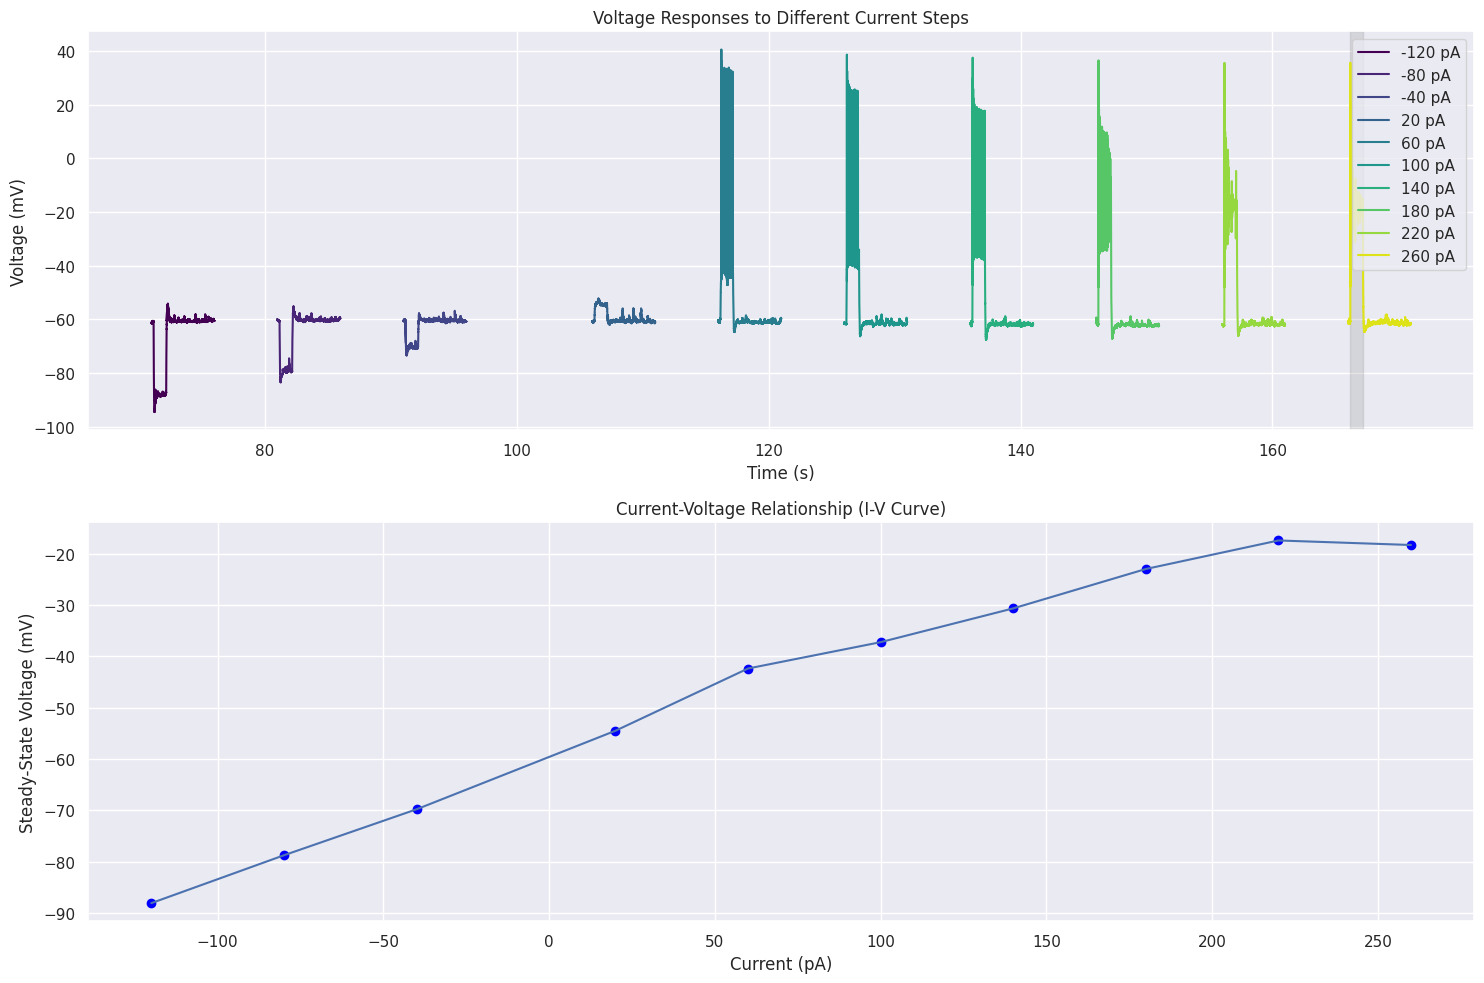

Input resistance from I-V curve slope: 228.69 MΩ (R² = 1.000)
Range of currents used: -120.0 to -40.0 pA


In [10]:
# Find all current step recordings
step_recordings = []
for series_name, series in nwb.acquisition.items():
    if 'step' in series.description.lower() and 'ch-0' in series_name:
        # Get the corresponding stimulus
        stim_name = series_name.replace('current_clamp-response', 'stimulus')
        stim_name = stim_name.replace('-ch-0', '-ch-0')
        
        if stim_name in nwb.stimulus:
            step_recordings.append((series_name, stim_name))

# Dictionary to store results: (series, stimulus, current_amplitude)
step_data = {}
print(f"Found {len(step_recordings)} current step recordings")

# Process each recording
for rec_name, stim_name in step_recordings[:20]:  # Limit to 20 for processing speed
    stimulus = nwb.stimulus[stim_name]
    response = nwb.acquisition[rec_name]
    
    # Extract stimulus amplitude - assuming a step protocol with constant current during the step
    stim_data = stimulus.data[:] * stimulus.conversion
    non_zero_values = stim_data[np.abs(stim_data) > 1e-13]
    if len(non_zero_values) > 0:
        # Use the most frequent non-zero value as the current amplitude
        unique_values, counts = np.unique(non_zero_values, return_counts=True)
        current_amplitude = unique_values[np.argmax(counts)]
        step_data[rec_name] = (response, stimulus, current_amplitude)

# Sort recordings by current amplitude
sorted_recordings = sorted(step_data.items(), key=lambda x: x[1][2])

if sorted_recordings:
    # Create arrays for I-V curve
    current_amplitudes = []
    voltage_responses = []
    
    # Time window for measuring steady-state voltage (seconds from start of step)
    steady_state_window = (0.8, 0.9)
    
    plt.figure(figsize=(15, 10))
    plt.subplot(2, 1, 1)
    
    # Color map for different current amplitudes
    cmap = plt.cm.viridis
    colors = [cmap(i/len(sorted_recordings)) for i in range(len(sorted_recordings))]
    
    # Plot a selection of traces (not too many to keep the plot readable)
    max_traces = 10
    step_selection = np.linspace(0, len(sorted_recordings)-1, min(max_traces, len(sorted_recordings))).astype(int)
    
    for i in step_selection:
        rec_name, (response, stimulus, current_amp) = sorted_recordings[i]
        
        # Create time array
        time = np.arange(response.data.shape[0]) / response.rate + response.starting_time
        
        # Convert data
        voltage_data = response.data[:] * response.conversion
        
        # Find step start and end
        stim_data = stimulus.data[:] * stimulus.conversion
        step_changes = np.where(np.diff(stim_data) != 0)[0]
        if len(step_changes) >= 2:
            step_start_idx = step_changes[0] + 1
            step_end_idx = step_changes[1] + 1
            
            # Plot the trace
            plt.plot(time, voltage_data*1e3, label=f"{current_amp*1e12:.0f} pA", color=colors[i])
            
            # Calculate steady-state voltage response (average over the specified window)
            steady_start_idx = step_start_idx + int(steady_state_window[0] * response.rate)
            steady_end_idx = step_start_idx + int(steady_state_window[1] * response.rate)
            steady_voltage = np.mean(voltage_data[steady_start_idx:steady_end_idx])
            
            # Store for I-V curve
            current_amplitudes.append(current_amp)
            voltage_responses.append(steady_voltage)
    
    # Plot step period
    if len(step_changes) >= 2:
        plt.axvspan(time[step_start_idx], time[step_end_idx], alpha=0.2, color='gray')
    
    plt.xlabel('Time (s)')
    plt.ylabel('Voltage (mV)')
    plt.title('Voltage Responses to Different Current Steps')
    plt.grid(True)
    plt.legend(loc='upper right')
    
    # Plot I-V curve
    plt.subplot(2, 1, 2)
    plt.scatter(np.array(current_amplitudes) * 1e12, np.array(voltage_responses) * 1e3, color='blue')
    plt.plot(np.array(current_amplitudes) * 1e12, np.array(voltage_responses) * 1e3, 'b-')
    plt.xlabel('Current (pA)')
    plt.ylabel('Steady-State Voltage (mV)')
    plt.title('Current-Voltage Relationship (I-V Curve)')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    # Calculate approximate input resistance from the I-V curve slope
    if len(current_amplitudes) > 1:
        # Focus on the linear region (negative currents) if available
        neg_currents = [(i, c) for i, c in enumerate(current_amplitudes) if c < 0]
        if len(neg_currents) >= 2:
            neg_indices = [i for i, _ in neg_currents]
            x = np.array([current_amplitudes[i] for i in neg_indices])
            y = np.array([voltage_responses[i] for i in neg_indices])
            
            # Linear regression to get slope
            from scipy.stats import linregress
            slope, intercept, r_value, p_value, std_err = linregress(x, y)
            
            print(f"Input resistance from I-V curve slope: {abs(slope)*1e-6:.2f} MΩ (R² = {r_value**2:.3f})")
            print(f"Range of currents used: {min(x)*1e12:.1f} to {max(x)*1e12:.1f} pA")
else:
    print("No sorted recordings available for I-V curve analysis")

## Examining Action Potentials

Now let's look for action potentials in response to depolarizing current steps.

Found 6 action potentials in recording current_clamp-response-21-ch-0
Current amplitude: 260.0 pA


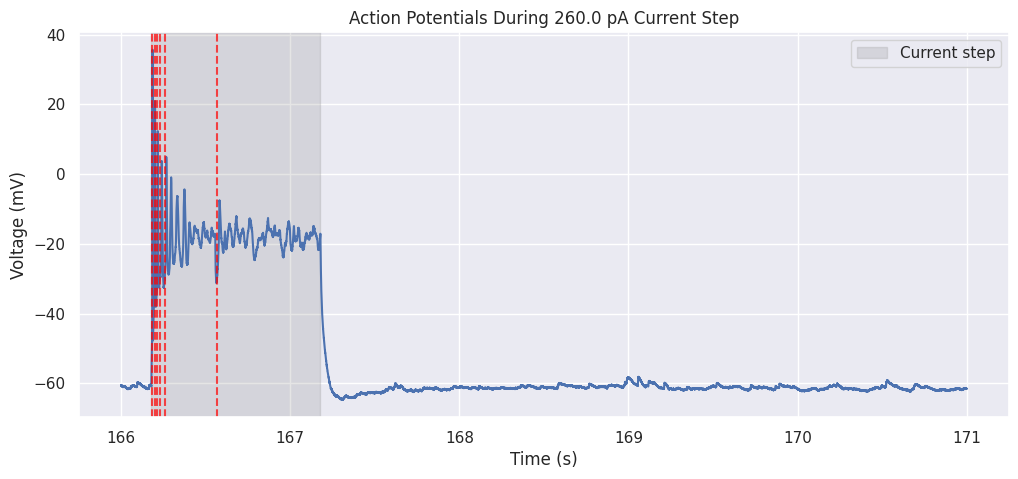

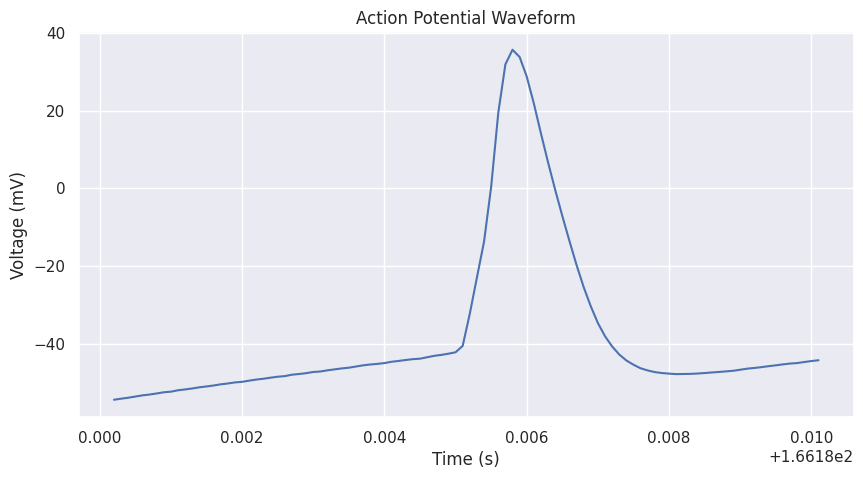


Action Potential Properties:
  Amplitude: 96.37 mV
  Threshold: 20.23 mV above rest
  Half-width: 1.00 ms


In [11]:
# Helper function to detect action potentials
def detect_spikes(voltage, threshold=-0.03):  # -30 mV threshold
    # Find threshold crossings
    thresh_crossings = np.where(np.diff((voltage > threshold).astype(int)) > 0)[0]
    return thresh_crossings

# Find a depolarizing step recording with action potentials
for rec_name, (response, stimulus, current_amp) in reversed(sorted_recordings):
    if current_amp > 0:  # Only depolarizing steps
        # Create time array
        time = np.arange(response.data.shape[0]) / response.rate + response.starting_time
        
        # Convert data
        voltage_data = response.data[:] * response.conversion
        
        # Find step start and end
        stim_data = stimulus.data[:] * stimulus.conversion
        step_changes = np.where(np.diff(stim_data) != 0)[0]
        if len(step_changes) >= 2:
            step_start_idx = step_changes[0] + 1
            step_end_idx = step_changes[1] + 1
            
            # Look for spikes during the step
            step_voltage = voltage_data[step_start_idx:step_end_idx]
            spike_indices = detect_spikes(step_voltage)
            
            if len(spike_indices) > 0:
                print(f"Found {len(spike_indices)} action potentials in recording {rec_name}")
                print(f"Current amplitude: {current_amp*1e12:.1f} pA")
                
                # Plot this trace with detected spikes
                plt.figure(figsize=(12, 5))
                plt.plot(time, voltage_data*1e3)
                
                # Mark the step duration
                plt.axvspan(time[step_start_idx], time[step_end_idx], alpha=0.2, color='gray', label='Current step')
                
                # Mark detected spikes
                for spike_idx in spike_indices:
                    absolute_idx = step_start_idx + spike_idx
                    plt.axvline(time[absolute_idx], color='red', linestyle='--', alpha=0.7)
                
                plt.xlabel('Time (s)')
                plt.ylabel('Voltage (mV)')
                plt.title(f'Action Potentials During {current_amp*1e12:.1f} pA Current Step')
                plt.legend()
                plt.grid(True)
                plt.show()
                
                # Also create a plot focusing on a single spike if there are any
                if len(spike_indices) > 0:
                    # Focus on the first spike
                    first_spike_idx = step_start_idx + spike_indices[0]
                    
                    # Window around the spike (ms)
                    window_ms = 5
                    samples_per_ms = response.rate / 1000
                    window_samples = int(window_ms * samples_per_ms)
                    
                    spike_start = max(0, first_spike_idx - window_samples)
                    spike_end = min(len(time), first_spike_idx + window_samples)
                    
                    plt.figure(figsize=(10, 5))
                    plt.plot(time[spike_start:spike_end], voltage_data[spike_start:spike_end]*1e3)
                    plt.xlabel('Time (s)')
                    plt.ylabel('Voltage (mV)')
                    plt.title('Action Potential Waveform')
                    plt.grid(True)
                    plt.show()
                
                # Calculate action potential properties
                if len(spike_indices) > 0:
                    # Use the first spike for analysis
                    spike_idx = spike_indices[0]
                    absolute_spike_idx = step_start_idx + spike_idx
                    
                    # Get a window around the spike
                    window_size = int(response.rate * 0.02)  # 20 ms window
                    spike_window = slice(
                        max(0, absolute_spike_idx - window_size // 2), 
                        min(len(voltage_data), absolute_spike_idx + window_size // 2)
                    )
                    spike_v = voltage_data[spike_window]
                    spike_t = time[spike_window]
                    
                    # Find spike amplitude and half-width
                    resting_v = np.percentile(spike_v, 5)  # Approximate baseline
                    peak_v = np.max(spike_v)
                    amplitude = peak_v - resting_v
                    
                    # Find spike threshold (approximation using max 2nd derivative)
                    d2v = np.diff(np.diff(spike_v))
                    threshold_idx = np.argmax(d2v) + 1  # +1 due to double diff
                    threshold_v = spike_v[threshold_idx]
                    
                    # Calculate half-width
                    half_max = resting_v + amplitude / 2
                    above_half_max = spike_v > half_max
                    above_half_max_indices = np.where(above_half_max)[0]
                    
                    if len(above_half_max_indices) > 1:
                        half_width_samples = above_half_max_indices[-1] - above_half_max_indices[0]
                        half_width_ms = (half_width_samples / response.rate) * 1000
                        
                        print("\nAction Potential Properties:")
                        print(f"  Amplitude: {amplitude*1e3:.2f} mV")
                        print(f"  Threshold: {(threshold_v - resting_v)*1e3:.2f} mV above rest")
                        print(f"  Half-width: {half_width_ms:.2f} ms")
                
                break

## Exploring Optogenetic Stimulation

Now let's look at responses to optogenetic stimulation with the 635nm laser pulses that activate channelrhodopsin.

Found 53 acquisition series with optogenetic stimulation on channel 0

Analyzing optogenetic response: current_clamp-response-22-ch-0
Description: Response to: episodic stimulation, 8*30Hz 635nm laser pulses, 10mW, 5ms width, every 30s


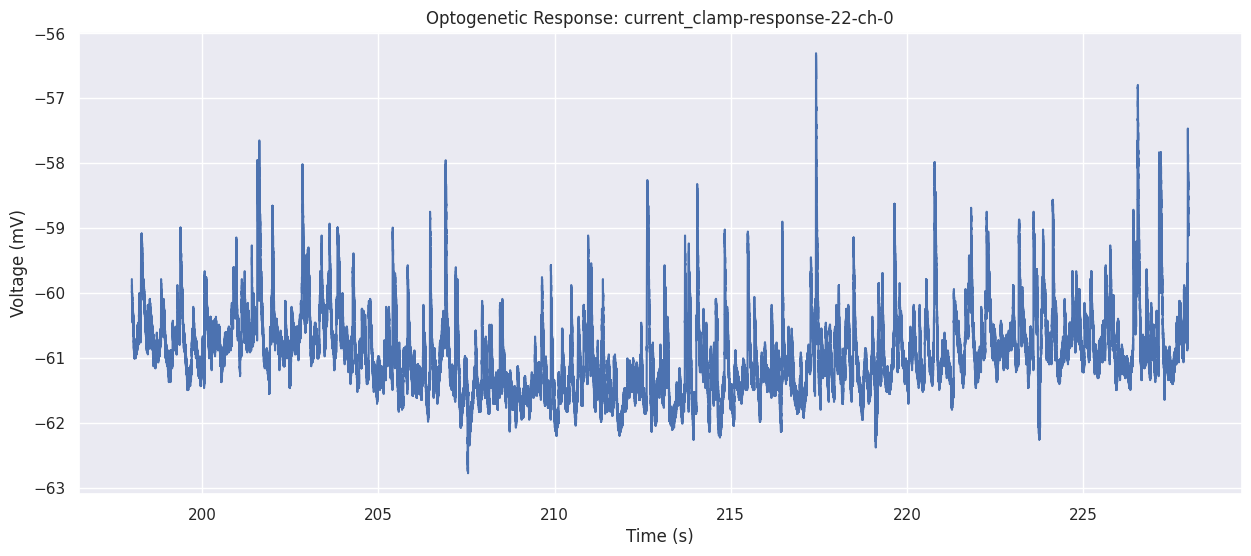

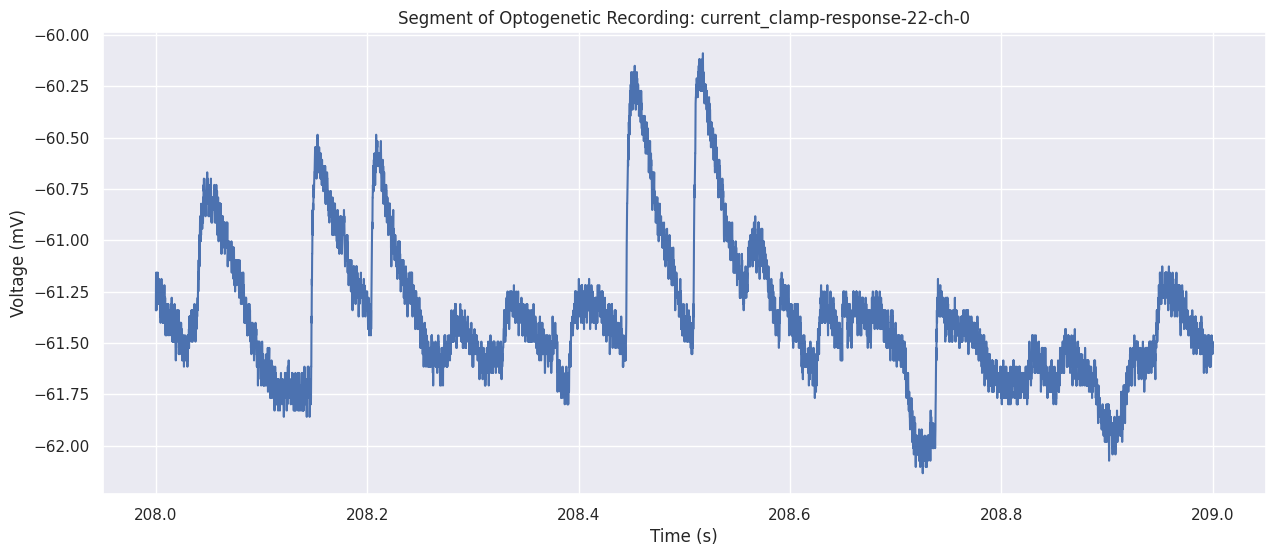

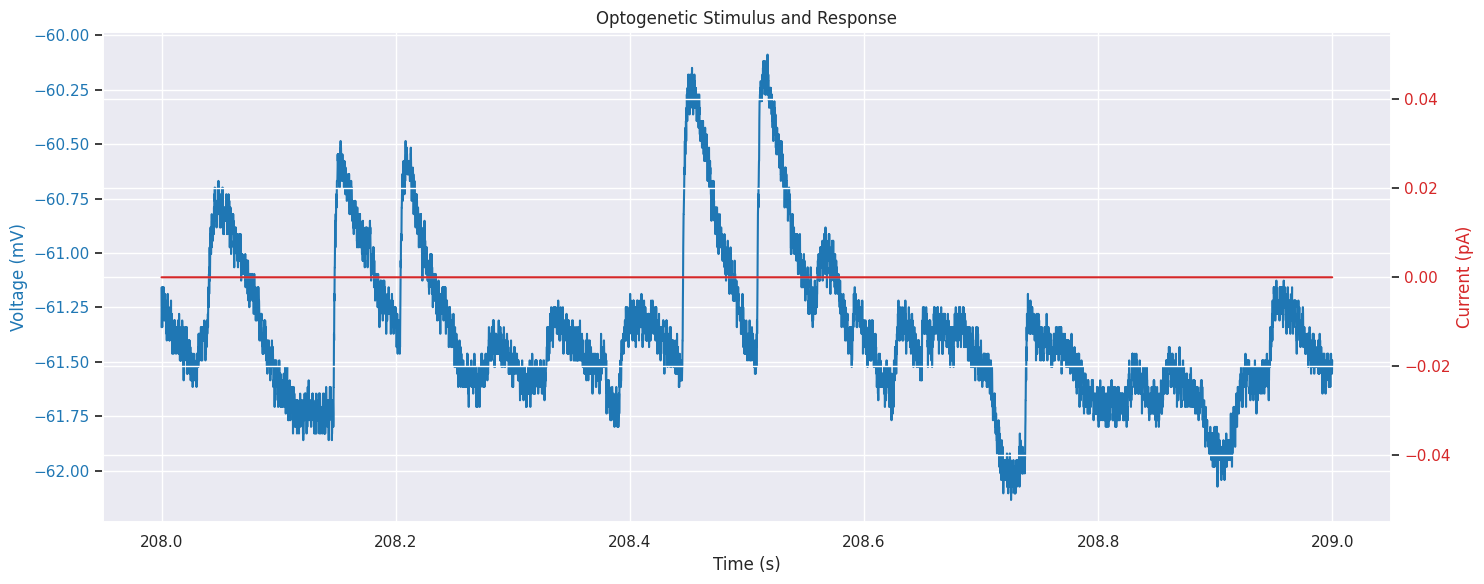

In [12]:
# Find recordings with optogenetic stimulation
opto_responses = []
for series_name, series in nwb.acquisition.items():
    desc = series.description.lower()
    if ('laser' in desc or 'light' in desc or '635nm' in desc) and 'ch-0' in series_name:
        opto_responses.append(series_name)

print(f"Found {len(opto_responses)} acquisition series with optogenetic stimulation on channel 0")

if opto_responses:
    # Select one recording to analyze
    response_name = opto_responses[0]
    response = nwb.acquisition[response_name]
    
    print(f"\nAnalyzing optogenetic response: {response_name}")
    print(f"Description: {response.description}")
    
    # Create time array
    time = np.arange(response.data.shape[0]) / response.rate + response.starting_time
    
    # Convert data
    voltage_data = response.data[:] * response.conversion
    
    # Look for the corresponding stimulus if available
    stim_name = response_name.replace('response', 'stimulus')
    stim_name = stim_name.replace('current_clamp-', '')
    
    # Get stimulus data if available
    if stim_name in nwb.stimulus:
        stimulus = nwb.stimulus[stim_name]
        stim_data = stimulus.data[:] * stimulus.conversion
    else:
        print(f"Corresponding stimulus {stim_name} not found")
        stim_data = None
    
    # Plot the full recording
    plt.figure(figsize=(15, 6))
    plt.plot(time, voltage_data*1e3)
    plt.xlabel('Time (s)')
    plt.ylabel('Voltage (mV)')
    plt.title(f'Optogenetic Response: {response_name}')
    plt.grid(True)
    plt.show()
    
    # Plot a segment to see more detail
    # Select the middle quarter of the recording
    segment_start = len(time) // 3
    segment_length = min(10000, len(time) // 4)
    segment_end = segment_start + segment_length
    
    plt.figure(figsize=(15, 6))
    plt.plot(time[segment_start:segment_end], voltage_data[segment_start:segment_end]*1e3)
    plt.xlabel('Time (s)')
    plt.ylabel('Voltage (mV)')
    plt.title(f'Segment of Optogenetic Recording: {response_name}')
    plt.grid(True)
    plt.show()
    
    # If we have stimulus data, plot a combined figure
    if stim_data is not None:
        fig, ax1 = plt.subplots(figsize=(15, 6))
        
        color = 'tab:blue'
        ax1.set_xlabel('Time (s)')
        ax1.set_ylabel('Voltage (mV)', color=color)
        ax1.plot(time[segment_start:segment_end], voltage_data[segment_start:segment_end]*1e3, color=color)
        ax1.tick_params(axis='y', labelcolor=color)
        
        ax2 = ax1.twinx()
        color = 'tab:red'
        ax2.set_ylabel('Current (pA)', color=color)
        ax2.plot(time[segment_start:segment_end], stim_data[segment_start:segment_end]*1e12, color=color)
        ax2.tick_params(axis='y', labelcolor=color)
        
        plt.title('Optogenetic Stimulus and Response')
        fig.tight_layout()
        plt.show()

## Summary and Conclusions

In this notebook, we've explored Dandiset 001195, which contains intracellular electrophysiology recordings examining dorsal raphe dopamine projections in relation to social isolation and loneliness-like states.

Key findings and demonstrations:

1. **Dataset Structure**: The dataset primarily contains patch-clamp recordings from different brain regions in mice expressing channelrhodopsin in dopaminergic neurons of the DRN.

2. **Passive Membrane Properties**: We analyzed hyperpolarizing current steps to measure:
   - Input resistance
   - Membrane time constant
   - Resting membrane potential

3. **Current-Voltage Relationship**: We produced an I-V curve showing how the neuron's membrane potential responds to different levels of current injection.

4. **Action Potentials**: We examined the neuron's spiking behavior in response to depolarizing current, including:
   - Spike frequency
   - Spike amplitude and threshold
   - Spike waveform characteristics

5. **Optogenetic Responses**: We explored the responses to 635nm laser stimulation, which activates channelrhodopsin in the recorded neurons or their inputs.

### Future Directions

Further analyses that could be conducted with this dataset:

- Comparing firing patterns across different experimental conditions (e.g., with/without blue light)
- Analyzing responses to different optogenetic stimulation patterns
- Comparing neuronal properties across different brain regions
- Correlating electrophysiological properties with behavioral measures of social isolation

This dataset provides valuable insights into the neural circuits underlying loneliness-like states, particularly the role of dorsal raphe dopamine projections to regions like the Central Amygdala.

## References

1. Dandiset 001195: [https://dandiarchive.org/dandiset/001195/0.250408.1733](https://dandiarchive.org/dandiset/001195/0.250408.1733)

2. Lee C.R., Matthews G.A., Lemieux M.E., Wasserlein E.M., Borio M., Miranda R.L., Keyes L.R., Schneider G.P., Jia C., Tran A., Aloboudi F., Chan M.G., Peroni E., Pereira G.S., López-Moraga A.L., Pallé A., Kimchi E.Y., Padilla-Coreano N., Wichmann R., Tye K.M. "Separable Dorsal Raphe Dopamine Projections Mediate the Facets of Loneliness-like State" bioRxiv 2025.02.03.636224; doi: https://doi.org/10.1101/2025.02.03.636224

### Acknowledgments

Thank you to the researchers who shared this dataset on DANDI. The data presented here are part of a larger study investigating the neural circuits underlying loneliness-like states in mice, with a focus on dorsal raphe dopamine projections to various brain regions.